## For assignment 4

#### This project is an extension of assignment 2, to a 2D feature space and to
####  a classification problem. You will note that the accuracy of the model
####  is not that high, suggesting that the model may not be the most
####  appropriate for the proposed data.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### First, the (simulated) data.

In [2]:

# red class  =  class 0

x0 = np.random.normal(2, 1, (60, 1))
y0 = np.random.normal(1, 1, (60, 1))

# green class  =  class 1

x1 = np.random.normal(5, 1, (70, 1))
y1 = np.random.normal(4, 1, (70, 1))

# blue class  =  class 2

x2 = np.random.normal(3, 1, (80, 1))
y2 = np.random.normal(7, 1, (80, 1))

# yellow class  =  class 3

x3 = np.random.normal(8, 1, (90, 1))
y3 = np.random.normal(0, 1, (90, 1))



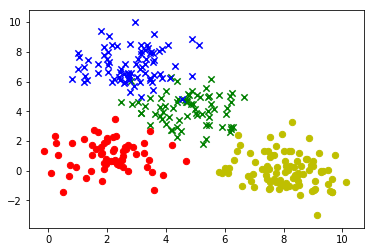

In [3]:
plt.scatter(x0, y0, c='r', marker='o', s=40)
plt.scatter(x1, y1, c='g', marker='x', s=40)
plt.scatter(x2, y2, c='b', marker='x', s=40)
plt.scatter(x3, y3, c='y', marker='o', s=40)

plt.show()

###  Combine the data into a single tensor.

In [4]:
d0 = np.hstack((x0, y0))
d1 = np.hstack((x1, y1))
d2 = np.hstack((x2, y2))
d3 = np.hstack((x3, y3))

feature_xy = np.vstack((d0, d1, d2, d3))

In [5]:
#   show shape of feature_xy
feature_xy.shape

(300, 2)

### Make one-hot encoding of the (desired) target classes

In [6]:
expected_class = np.matrix([[1., 0., 0., 0.]] * len(x0) \
                        +  [[0., 1., 0., 0.]] * len(x1) \
                        +  [[0., 0., 1., 0.]] * len(x2) \
                        +  [[0., 0., 0., 1.]] * len(x3) )

### Shuffle the data points (and corresponding classes)
### to avoid skewing the learning.

In [7]:
indices = np.arange(feature_xy.shape[0])

np.random.shuffle(indices)

feature_xy = feature_xy[indices, :]

expected_class = expected_class[indices, :]

### The usual.

In [8]:
import tensorflow as tf

### Hyper-parameters.   Play with these, to see if they make a difference.

In [9]:
learning_rate = 0.03
training_epochs = 10000

num_classes = 4
batch_size = 100

###  The feature tensor shape.

In [10]:
training_size, num_features = feature_xy.shape

###  1. Make placeholders X and Y for model inputs and corresponding desired classes.

In [11]:
X=tf.placeholder("float", shape=[None,2])
Y=tf.placeholder("float", shape=[None,2])
#[None,2] need two features

### 2. Make variables W and b for the weights and biases of the TensorFlow model.

In [27]:
#W1 is based on training size by num features (reversed)
W1=tf.Variable(tf.random_normal([num_features,training_size], stddev=0.03), name='W1')
#To get the class matrix probobility
#W2 is num features by num classes
W2=tf.Variable(tf.random_normal([training_size,num_classes], stddev=0.03), name='W2')

#bias 1 is based on training size
b1=tf.Variable(tf.random_normal([training_size]), name='b1')
#Also used for the number of classes we want
#bias 2 based on num of num of classes
b2=tf.Variable(tf.random_normal([num_classes], name='b2'))

###  3. Define the model, i.e. the model output.  I just call it model.
###      Use the sigmoid activation. Softmax the output, of course.

In [28]:
out1 = tf.sigmoid(tf.add(tf.matmul(X,W1), b1))
model = tf.add(tf.matmul(out1,W2),b2)

### 4. Define the loss (cost) function as the cross-entropy 
### between desired class and actual class computed by model.

In [29]:
#Logit it output of the model. No need for reduce sum with cross entropy function
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

### 5. Define minimizer for the loss function.

In [30]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 6. Make the Session object, and
###     initialize global variables.

In [31]:
init = tf.global_variables_initializer()

In [32]:
sess = tf.Session()

In [33]:
sess.run(init)

### The batch training

In [34]:
for step in range(training_epochs * training_size // batch_size):
    offset = (step * batch_size) % training_size
    batch_data = feature_xy[offset:(offset + batch_size), :]
    batch_classes = expected_class[offset:(offset + batch_size)]
    err, _ = sess.run([loss, minimizer], feed_dict={X: batch_data, Y: batch_classes})
    if step % 200 == 0:
        print (step, err)

0 2.11973
200 0.688706
400 0.38509
600 0.234182
800 0.192549
1000 0.167613
1200 0.130205
1400 0.139052
1600 0.125227
1800 0.103119
2000 0.120969
2200 0.107759
2400 0.0906988
2600 0.111575
2800 0.0981341
3000 0.0834859
3200 0.10562
3400 0.0919535
3600 0.078737
3800 0.101402
4000 0.0875916
4200 0.0753614
4400 0.0982032
4600 0.0843113
4800 0.0728345
5000 0.0956651
5200 0.0817304
5400 0.0708701
5600 0.0935859
5800 0.0796303
6000 0.0692973
6200 0.0918416
6400 0.0778769
6600 0.0680076
6800 0.0903514
7000 0.0763829
7200 0.0669287
7400 0.0890593
7600 0.0750889
7800 0.0660106
8000 0.0879254
8200 0.0739529
8400 0.0652175
8600 0.0869202
8800 0.0729445
9000 0.0645236
9200 0.086021
9400 0.0720407
9600 0.0639096
9800 0.0852106
10000 0.0712241
10200 0.0633609
10400 0.0844751
10600 0.0704812
10800 0.0628663
11000 0.0838036
11200 0.0698011
11400 0.0624171
11600 0.0831872
11800 0.0691752
12000 0.0620064
12200 0.0826187
12400 0.0685966
12600 0.0616288
12800 0.0820918
13000 0.0680593
13200 0.0612795
13400

###  7. Show the weights and biases obtained for the model, after training.

In [46]:
learned_w1=sess.run(W1)
learned_b1=sess.run(b1)
print("Learned W", learned_w1)
print("Learned b", learned_b1)

Learned W [[-0.3866176   0.07681652 -0.00808992 -0.0592291  -0.02181638 -0.03471012
  -0.25721997 -0.22485094  0.06565104 -0.3020747   0.01896844  0.28094274
   0.17867696 -0.21727619 -0.09448799  0.09514847  0.16039245 -0.40237635
  -0.14099206 -0.44220906  0.32965234 -0.24321747 -0.11795603  0.2927503
   0.39647979 -0.27573118 -0.38478532 -0.2670922  -0.09077352 -0.22174709
  -0.05323688 -0.33596775  0.35407197 -0.28074974 -0.34080124 -0.30785775
   0.10637208 -0.1923856  -0.39065436  0.15545765  0.15693666 -0.02699632
  -0.0695513  -0.32420614 -0.17450829  0.17846628 -0.42229411 -0.4225271
  -0.212107    0.34071285 -0.29434848 -0.04060499 -0.2486286  -0.20806871
   0.37402099 -0.07013786 -0.3248271   0.36574736 -0.2375368  -0.30400959
  -0.43336096 -0.5213539  -0.01897461 -0.09868034 -0.38710082 -0.11140012
  -0.18306883 -0.08143695  0.25527883 -0.15424256 -0.174999   -0.17920433
   0.1312104   0.24402225 -0.15122291  0.2187123  -0.42971596  0.19217104
   0.17001012  0.28235662 -0.2

###  Make a few predictions.

In [35]:
feed_dict = { X: [[8.0,-1.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[3]


#### _Ian's Predicitions_

In [36]:
#I believe this output for this will be class 0
feed_dict = { X: [[2.0,2.0]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[0]


In [37]:
#I believe this output for this will be class 1
feed_dict = { X: [[4.5,4.5]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[1]


In [38]:
#I believe this output for this will be class 2
feed_dict = { X: [[8.0,2.5]] }    # input X must be of shape [None,2]
class_vector = sess.run(model, feed_dict)
class_number = sess.run(tf.argmax(class_vector,1))
print(class_number)

[3]


### Making an accuracy node.

In [39]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

### Use on the original data.

In [40]:
training_accuracy = sess.run([accuracy], feed_dict={X: feature_xy, Y: expected_class})

In [41]:
print(training_accuracy)

[0.98333335]


### 8. Make test data similar to the provided data above.
###     Just 10 datapoints for each of the 4 classes.

In [42]:
#Notice the 10 in the paranthesis, makes 10 more points as specified

x0 = np.random.normal(3, 1, (10, 1))
y0 = np.random.normal(2, 1, (10, 1))


x1 = np.random.normal(4, 1, (10, 1))
y1 = np.random.normal(3, 1, (10, 1))


x2 = np.random.normal(4, 1, (10, 1))
y2 = np.random.normal(6, 1, (10, 1))


x3 = np.random.normal(9, 1, (10, 1))
y3 = np.random.normal(1, 1, (10, 1))

###  9. Run the training on the test data.

In [47]:
d0 = np.hstack((x0, y0))
d1 = np.hstack((x1, y1))
d2 = np.hstack((x2, y2))
d3 = np.hstack((x3, y3))

feature_xy = np.vstack((d0, d1, d2, d3))

In [48]:
#   show shape of feature_xy
feature_xy.shape

(40, 2)

In [49]:
expected_class = np.matrix([[1., 0., 0., 0.]] * len(x0) \
                        +  [[0., 1., 0., 0.]] * len(x1) \
                        +  [[0., 0., 1., 0.]] * len(x2) \
                        +  [[0., 0., 0., 1.]] * len(x3) )

In [50]:
indices = np.arange(feature_xy.shape[0])

np.random.shuffle(indices)

feature_xy = feature_xy[indices, :]

expected_class = expected_class[indices, :]

In [51]:
training_size, num_features = feature_xy.shape

In [52]:
#W1 is based on training size by num features (reversed)
W1=tf.Variable(tf.random_normal([num_features,training_size], stddev=0.03), name='W1')
#To get the class matrix probobility
#W2 is num features by num classes
W2=tf.Variable(tf.random_normal([training_size,num_classes], stddev=0.03), name='W2')

#bias 1 is based on training size
b1=tf.Variable(tf.random_normal([training_size]), name='b1')
#Also used for the number of classes we want
#bias 2 based on num of num of classes
b2=tf.Variable(tf.random_normal([num_classes], name='b2'))

In [53]:
out1 = tf.sigmoid(tf.add(tf.matmul(X,W1), b1))
model = tf.add(tf.matmul(out1,W2),b2)

In [54]:
#Logit it output of the model. No need for reduce sum with cross entropy function
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

In [55]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [56]:
init = tf.global_variables_initializer()

In [57]:
sess = tf.Session()

In [58]:
sess.run(init)

Training 

In [59]:
for step in range(training_epochs * training_size // batch_size):
    offset = (step * batch_size) % training_size
    batch_data = feature_xy[offset:(offset + batch_size), :]
    batch_classes = expected_class[offset:(offset + batch_size)]
    err, _ = sess.run([loss, minimizer], feed_dict={X: batch_data, Y: batch_classes})
    if step % 200 == 0:
        print (step, err)

0 1.97489
200 1.24066
400 0.948491
600 0.78032
800 0.67501
1000 0.604713
1200 0.553468
1400 0.518108
1600 0.492905
1800 0.473473
2000 0.457802
2200 0.444763
2400 0.43368
2600 0.424152
2800 0.41591
3000 0.408733
3200 0.402432
3400 0.396855
3600 0.391888
3800 0.387441


###  10. Use accuracy node on your test data.

In [60]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [61]:
training_accuracy = sess.run([accuracy], feed_dict={X: feature_xy, Y: expected_class})

In [62]:
print(training_accuracy)

[0.82499999]
